# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-файла" data-toc-modified-id="Изучение-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение файла</a></span></li><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение файла

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')
df.sample(10)

,calls,minutes,messages,mb_used,is_ultra
734,24.0,144.50,11.0,10879.10,0
1780,73.0,419.90,0.0,18521.67,0
406,89.0,580.69,0.0,19640.23,0
2827,73.0,582.47,33.0,12095.91,0
3060,42.0,277.25,49.0,15483.11,0
1027,72.0,487.78,20.0,28187.72,0
314,14.0,79.26,32.0,8246.64,0
2153,77.0,627.88,26.0,14153.70,0
1513,93.0,654.02,38.0,14732.96,0
2394,92.0,662.15,32.0,27426.21,1


* сalls — количество звонков,
* minutes — суммарная длительность звонков в минутах,
* messages — количество sms-сообщений,
* mb_used — израсходованный интернет-трафик в Мб,
* is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропусков нет, можно приступать к дальнейшим действиям.

Исследуем факторы на мультиколлинерность.

In [4]:
print(df.corr()) 

             calls   minutes  messages   mb_used  is_ultra
calls     1.000000  0.982083  0.177385  0.286442  0.207122
minutes   0.982083  1.000000  0.173110  0.280967  0.206955
messages  0.177385  0.173110  1.000000  0.195721  0.203830
mb_used   0.286442  0.280967  0.195721  1.000000  0.198568
is_ultra  0.207122  0.206955  0.203830  0.198568  1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd89fcdf910>,
      dtype=object)

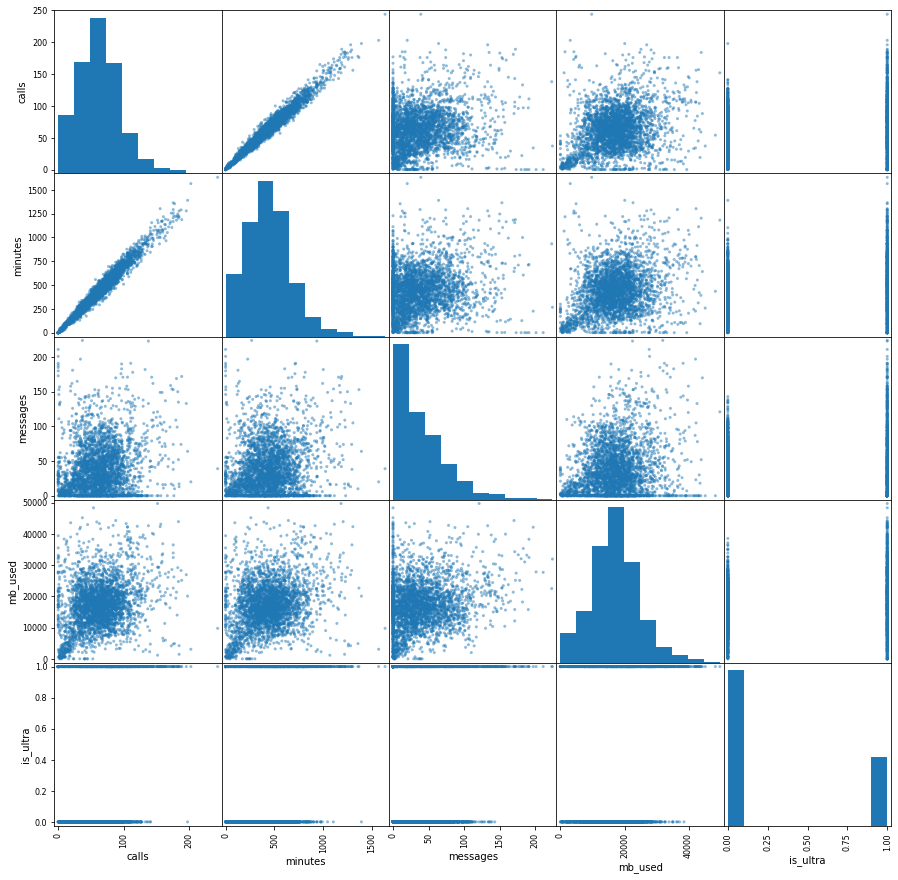

In [5]:
pd.plotting.scatter_matrix(df, figsize=(15, 15)) 

Количество звонков и суммарная длительность звонков в минутах имеют сильную связь друг с другом, следовательно, один из этих факторов в дальнейшем можно исключить.

## Разделение данных на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки в соотношении 0.6, 0.2 и 0.2.

In [6]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 12345)
df_train, df_valid = train_test_split(df_train, test_size = 0.25, random_state = 12345)

Выведем на экран размеры таблиц, которые хранятся в трех переменных.

In [7]:
print('Обучающая выборка:', df_train.shape)
print('Валидационная выборка:', df_valid.shape)
print('Тестовая выборка:', df_test.shape)

Обучающая выборка: (1928, 5)
Валидационная выборка: (643, 5)
Тестовая выборка: (643, 5)


## Исследование моделей

Cоздадим переменные для признаков и целевого признака для обучающей и валидационной выборок.

In [8]:
features_train = df_train.drop(['is_ultra', 'calls'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra', 'calls'], axis=1)
target_valid = df_valid['is_ultra']

### Дерево решений

Запустим обучение модели "Дерево решений" для разных глубин.

In [9]:
depth_accuracy = []
depths = []
accuracy = []
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11):
    depths.append(depth)
    model = DecisionTreeClassifier(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions_valid)
    accuracy.append(result)
    print('max_depth =', depth, ":", result)
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
print('\n')

max_depth = 1 : 0.7387247278382582
max_depth = 2 : 0.7573872472783826
max_depth = 3 : 0.7651632970451011
max_depth = 4 : 0.7651632970451011
max_depth = 5 : 0.7667185069984448
max_depth = 6 : 0.7667185069984448
max_depth = 7 : 0.7682737169517885
max_depth = 8 : 0.7636080870917574
max_depth = 9 : 0.7573872472783826
max_depth = 10 : 0.76049766718507




Построим график зависимости accuracy от глубины дерева решений.

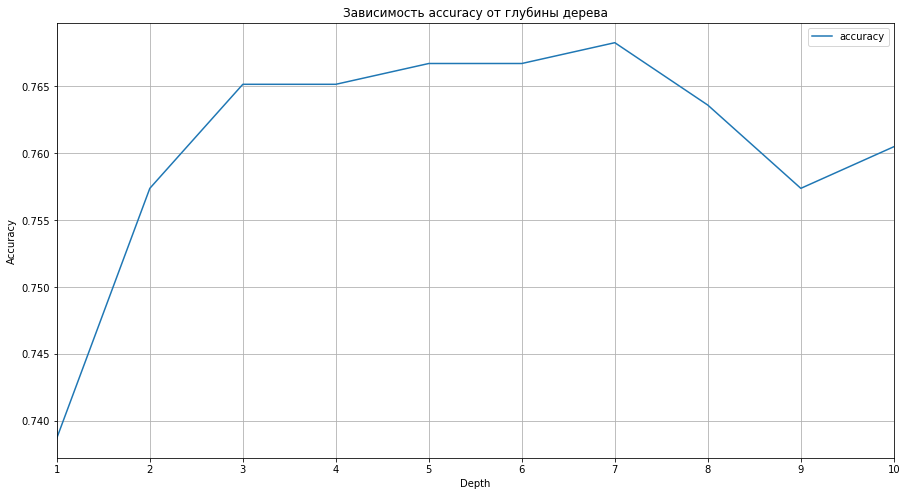

In [10]:
depth_accuracy = pd.DataFrame({'depth': depths, 'accuracy': accuracy})

depth_accuracy.plot.line(x = 'depth', y = 'accuracy', grid = True, figsize = (15,8))
plt.title('Зависимость accuracy от глубины дерева')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [11]:
print('Глубина наилучшего дерева решений:', best_depth)
print('Accuracy наилучшего дерева решений:', best_result)

Глубина наилучшего дерева решений: 7
Accuracy наилучшего дерева решений: 0.7682737169517885


### Случайный лес

Запустим обучение модели "Случайный лес" для разного числа деревьев и разных глубин.

In [12]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 5):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
print("Accuracy наилучшей модели случайного леса:", best_result)
print("Число деревьев и глубина наилучшей модели случайного леса:", best_est, 'и', best_depth)

Accuracy наилучшей модели случайного леса: 0.7978227060653188
Число деревьев и глубина наилучшей модели случайного леса: 50 и 10


### Логистическая регрессия

In [13]:
model = LogisticRegression(random_state = 12345, solver = 'lbfgs')
model.fit(features_train, target_train)
result = model.score(features_valid, target_valid)

print("Accuracy модели логистической регрессии:", result)

Accuracy модели логистической регрессии: 0.7262830482115086


### Вывод

В результате исследования различных моделей: 
* Дерево решений:
    * Глубина наилучшего дерева решений: 7
    * Accuracy наилучшего дерева решений: 0.7682737169517885

* Случайный лес:
    * Accuracy наилучшей модели случайного леса: 0.7978227060653188
    * Число деревьев и глубина наилучшей модели случайного леса: 50 и 10
* Логистическая регрессия:
    * Accuracy модели логистической регрессии: 0.7262830482115086
    
Модель случайного леса с 50-ю деревьями и глубиной, равной 10, лучшая по качеству - 79.78%.

## Проверка модели на тестовой выборке

Cоздадим переменные для признаков и целевого признака для тестовой выборки.

In [39]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [43]:
model = RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
model.fit(features_train, target_train) 
result = model.score(features_valid, target_valid)
print("Accuracy модели случайного леса на тестовой выборке:", best_result)

Accuracy модели случайного леса на тестовой выборке: 0.7978227060653188


Качество модели случайного леса на тестовой выборке оказалась равной 0.7978227060653188.

## Проверка модели на адекватность

Возьмём самый большой класс и предположим, что новая модель будет предсказывать его на все случаи.

In [41]:
df['is_ultra'].value_counts(normalize=True) 

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Получается, качество такой модели будет 69%. Качества же наших моделей выше 70-ти %. Следовательно, наши модели можно считать адекватными.